# Tentative de reproduction de la figure 3.1 de la these de Wissel

In [31]:
from pathlib import Path
import os
from mainfct import mainfct
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import matplotlib.cm as cm

def coorno(n):
    x1=n%L
    x2=n//L
    return (x1, x2)

In [35]:
nbfile=1 #nb of different data
alpha=[1]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[10]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
nbins=12  #nb of points for the fit
L=128
lenghtTab=20*L**2 
nbdisip=int(nalpha/nbfile)


path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut/Visualisation'

foldername = [1]
time=np.array([1e6,1e7,1e8,1e9])

file = f"{brutpath}/Vi1"
file2 = f"{brutpath}/Bo2"

snapshot=np.zeros((len(foldername),len(time) , L*L))


for i, term in enumerate(foldername):
    for x, t in enumerate (time):
        f=open(f"{file}{term}/nav{int(t)}_outputB.txt")
        
        j = 0 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split("  ")
                snapshot[i][x][j]=col[0]
                j+=1

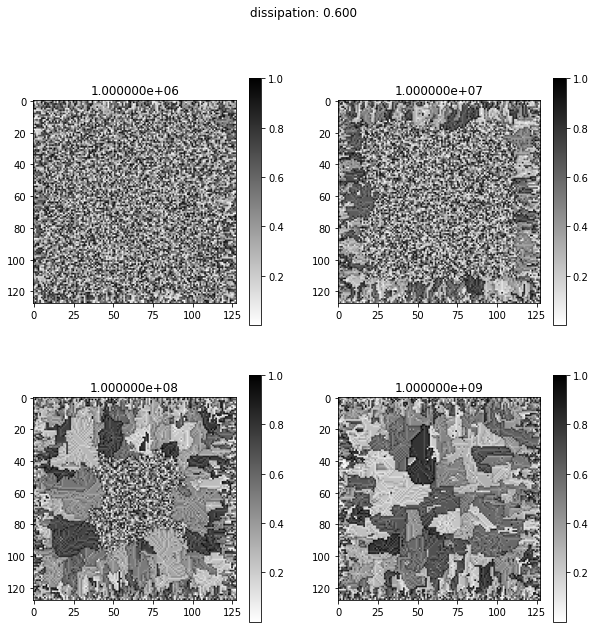

In [36]:
sys=np.zeros((len(foldername),len(time),L,L))


for i in range(len(foldername)):
    for j in range(len(time)):
        for n in range (L*L):
            x1, x2=coorno(n)
            sys[i][j][x1][x2]=snapshot[i][j][n]

        
def figure(tab3D,L,j):
    
    plt.figure(figsize=(10,10))        
    nbfig=len(tab3D)

    for i in range(nbfig):
        plt.subplot( int((len(time)/2)+0.5), int((len(time)/2)), i+1)
        plt.imshow(tab3D[i], cmap="binary")
        plt.title(f"{time[i]:e}")
        plt.colorbar()
    plt.suptitle(f"dissipation: {1-4*(alpha[j]/ncifras[j]):.3f}")
    plt.gca().set_aspect('equal', adjustable='box')

for i in range (len(foldername)):
    figure(sys[i], L, i)

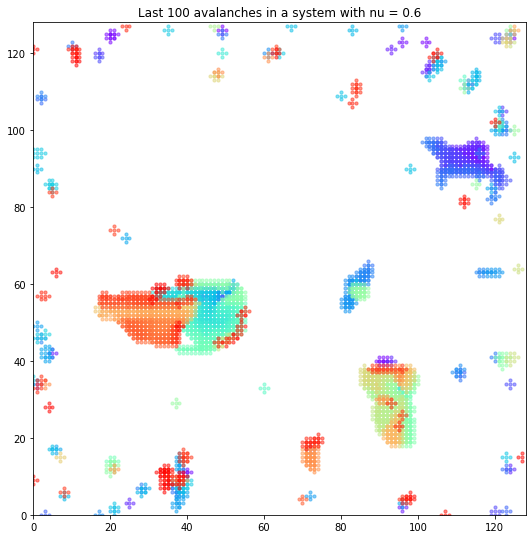

In [42]:
dissipation = np.array([0.60])

L=128

plt.figure(figsize=(30,10)) 

for i, term in enumerate(foldername):
    
    colors = iter(cm.rainbow(np.linspace(0, 1, 1001)))
    f=f"{file}{term}/shape_outputB.txt"
    shape = open(f, "r")
    plt.subplot(1, 3, i+1)

    for line in shape:
        x1, x2 = [], []
        col = line.strip().split()
        for n in range(len(col)):
            x1_value, x2_value = coorno(int(col[n]))
            x1.append(x1_value)
            x2.append(x2_value)
        plt.scatter(x1,x2, s = 10, color = next(colors), alpha = 0.5)
        
    plt.axis([0, 128, 0, 128])
    j=i
    if(i == 1):
        j = 2
    if(i == 2):
        j = 1 
    plt.title(f"Last 100 avalanches in a system with nu = {dissipation[j]}")
    plt.gca().set_aspect('equal', adjustable='box')


plt.show()